In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset_path = '/Users/gwynethang/Downloads/terrorism_new.csv'
dataset = pd.read_csv(dataset_path)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#put the thing that you want to predict to the rightmost column
dataset = dataset.loc[:,['country','region','latitude','longitude','attacktype1',
                         'weaptype1','targtype1','gname','nkill','success']]

In [5]:
dataset

,country,region,latitude,longitude,attacktype1,weaptype1,targtype1,gname,nkill,success
0,58,2,18.456792,-69.951164,1,13,14,MANO-D,1.0,1
1,130,1,19.371887,-99.086624,6,13,7,23rd of September Communist League,0.0,1
2,160,5,15.478598,120.599741,1,13,10,Unknown,1.0,1
3,78,8,37.997490,23.762728,3,6,7,Unknown,NaN,1
4,101,4,33.580412,130.396361,7,8,7,Unknown,NaN,1
5,217,1,37.005105,-89.176269,2,5,3,Black Nationalists,0.0,1
6,218,3,-34.891151,-56.187214,1,5,3,Tupamaros (Uruguay),0.0,0
7,217,1,37.791927,-122.225906,3,6,21,Unknown,0.0,1
8,217,1,43.076592,-89.412488,7,8,4,New Year's Gang,0.0,1
9,217,1,43.072950,-89.386694,7,8,2,New Year's Gang,0.0,1


In [6]:
name_map = {}
unique_gname = dataset['gname'].unique()
for i in range(len(unique_gname)):
    name_map[unique_gname[i]] = i

In [7]:
dataset = dataset.replace({"gname":name_map})
dataset = dataset.dropna()

In [1]:
dataset.success == 1

NameError: name 'dataset' is not defined

In [9]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('success', axis = 1), dataset['success'], test_size = 0.3, random_state = 42)

In [10]:
# Instantiate model with 1000 decision trees
forest_classifier = RandomForestClassifier(n_estimators = 100)
# Train the model on training data
forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
forest_classifier.score(X_test, y_test)

0.9156981688304325

## Precision Recall -- Binary Class

In [14]:
predictions = forest_classifier.predict(X_test)

In [15]:
predictions

array([1, 1, 0, ..., 1, 1, 1])

In [16]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.93


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.93')

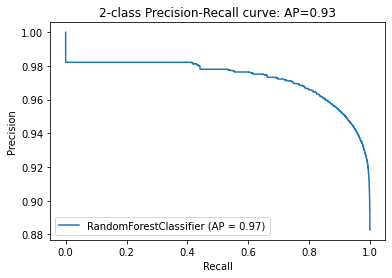

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(forest_classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))